<a href="https://colab.research.google.com/github/shaambuildon/MACHINE-LEARNING-TECHNIQUES/blob/main/task_7_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-230313474.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Can we play sports? No


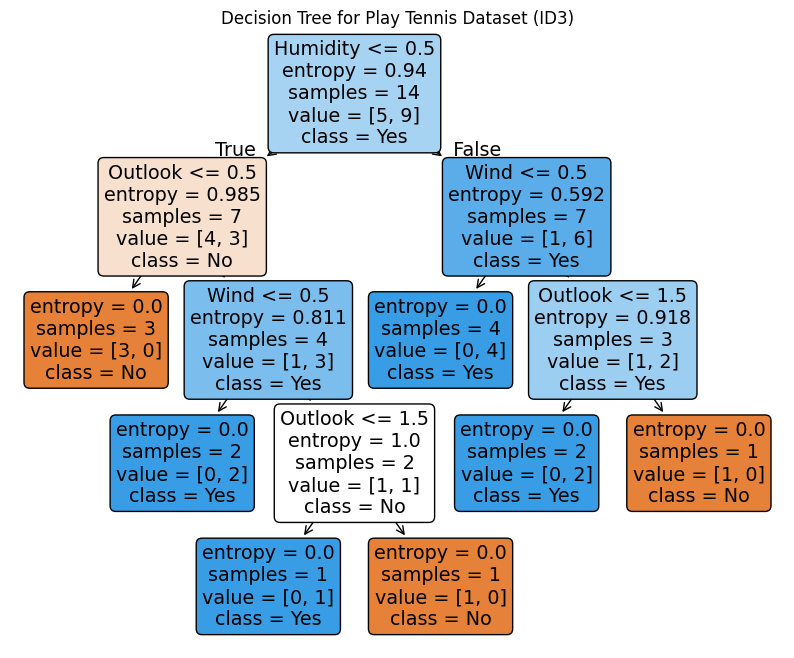

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Create a sample dataset for the 'Play Tennis' problem.
# The data includes categorical features like 'Outlook', 'Temperature', etc., and a target 'Play'.
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny',
                'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild',
                    'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
                 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak',
             'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# 2. Map categorical features to numerical values, as machine learning models require numerical input.
# This is a key step for preparing the data.
mapping = {
    'Sunny': 0, 'Overcast': 1, 'Rainy': 2,
    'Hot': 0, 'Mild': 1, 'Cool': 2,
    'High': 0, 'Normal': 1,
    'Weak': 0, 'Strong': 1,
    'No': 0, 'Yes': 1
}
df.replace(mapping, inplace=True)

# 3. Split the dataset into features (X) and the target variable (y).
X = df.drop('Play', axis=1)
y = df['Play']

# 4. Build the Decision Tree classifier using the ID3 algorithm.
# In scikit-learn, the ID3 algorithm is implemented by setting criterion='entropy'.
# The random_state parameter ensures reproducibility of the results.
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# 5. Define a function to classify a new, unseen sample.
def classify_new_sample(sample, clf_model, mapping):
    """
    Classifies a new sample based on the trained decision tree model.
    :param sample: A dictionary with the new sample's feature values.
    :param clf_model: The trained DecisionTreeClassifier model.
    :param mapping: The mapping dictionary used for numerical conversion.
    :return: A string ('Yes' or 'No') representing the predicted class.
    """
    # Convert the new sample's categorical values to numerical values.
    # The order of values must match the order of columns in the training data (X).
    sample_values = [mapping[sample['Outlook']], mapping[sample['Temperature']],
                     mapping[sample['Humidity']], mapping[sample['Wind']]]

    # The predict method requires a 2D array, so we wrap the sample in a list.
    predicted_class = clf_model.predict([sample_values])

    # Convert the numerical prediction back to a human-readable class label.
    return "Yes" if predicted_class[0] == 1 else "No"

# 6. Use the function to classify an example new sample.
new_sample = {'Outlook': 'Sunny', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Weak'}
predicted_play = classify_new_sample(new_sample, clf, mapping)
print(f"Can we play sports? {predicted_play}")

# 7. Plot the decision tree to visualize the learned rules.
# The `plot_tree` function from scikit-learn is used for this purpose.
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Play Tennis Dataset (ID3)")
plt.show() # Corrected from pltshow() to plt.show()
